#  Assignment 1 > An Analytical Detective

## Problem 1.1 - Loading the Data

(1 point possible)
Read the dataset mvtWeek1.csv into R, using the read.csv function, and call the data frame "mvt". Remember to navigate to the directory on your computer containing the file mvtWeek1.csv first. It may take a few minutes to read in the data, since it is pretty large. 

In [1]:
mvt <- read.csv("mvtWeek1.csv",header =TRUE)

 use the str and summary functions to answer the following questions.

In [2]:
str(mvt)

'data.frame':	191641 obs. of  11 variables:
 $ ID                 : int  8951354 8951141 8952745 8952223 8951608 8950793 8950760 8951611 8951802 8950706 ...
 $ Date               : Factor w/ 131680 levels "1/1/01 0:01",..: 42824 42823 42823 42823 42822 42821 42820 42819 42817 42816 ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 62 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 1622 724 211 2521 423 231 1021 1215 ...
 $ District           : int  6 12 16 7 2 25 4 2 10 12 ...
 $ CommunityArea      : int  69 24 11 67 35 19 48 40 29 24 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude          : num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [3]:
summary(mvt)

       ID                      Date       
 Min.   :1310022   5/16/08 0:00  :    11  
 1st Qu.:2832144   10/17/01 22:00:    10  
 Median :4762956   4/13/04 21:00 :    10  
 Mean   :4968629   9/17/05 22:00 :    10  
 3rd Qu.:7201878   10/12/01 22:00:     9  
 Max.   :9181151   10/13/01 22:00:     9  
                   (Other)       :191582  
                     LocationDescription   Arrest         Domestic      
 STREET                        :156564   Mode :logical   Mode :logical  
 PARKING LOT/GARAGE(NON.RESID.): 14852   FALSE:176105    FALSE:191226   
 OTHER                         :  4573   TRUE :15536     TRUE :415      
 ALLEY                         :  2308   NA's :0         NA's :0        
 GAS STATION                   :  2111                                  
 DRIVEWAY - RESIDENTIAL        :  1675                                  
 (Other)                       :  9558                                  
      Beat         District     CommunityArea        Year         Latitu

How many rows of data (observations) are in this dataset?

In [4]:
nrow(mvt)

[1] 191641

How many variables are in this dataset?

In [5]:
ncol(mvt)

[1] 11

Using the "max" function, what is the maximum value of the variable "ID"?

In [6]:
max(mvt$ID, na.rm = TRUE)

[1] 9181151

What is the minimum value of the variable "Beat"?

In [7]:
min(mvt$Beat, na.rm = TRUE)

[1] 111

How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?

How many observations have a LocationDescription value of ALLEY?

## Problem 2.1 - Understanding Dates in R

In many datasets, like this one, you have a date field. Unfortunately, R does not automatically recognize entries that look like dates. We need to use a function in R to extract the date and time. Take a look at the first entry of Date (remember to use square brackets when looking at a certain entry of a variable).

## Problem 2.2 - Understanding Dates in R

Now, let's convert these characters into a Date object in R. In your R console, type

DateConvert = as.Date(strptime(mvt$Date, "%m/%d/%y %H:%M"))

This converts the variable "Date" into a Date object in R. Take a look at the variable DateConvert using the summary function.

What is the month and year of the median date in our dataset? Enter your answer as "Month Year", without the quotes. (Ex: if the answer was 2008-03-28, you would give the answer "March 2008", without the quotes.)

In [8]:
DateConvert = as.Date(strptime(mvt$Date, "%m/%d/%y %H:%M"))

In [9]:
summary(DateConvert)

        Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31" 

## Problem 2.3 - Understanding Dates in R

Now, let's extract the month and the day of the week, and add these variables to our data frame mvt. We can do this with two simple functions. Type the following commands in R:

mvt$Month = months(DateConvert)

mvt$Weekday = weekdays(DateConvert)

This creates two new variables in our data frame, Month and Weekday, and sets them equal to the month and weekday values that we can extract from the Date object. Lastly, replace the old Date variable with DateConvert by typing:

mvt$Date = DateConvert

Using the table command, answer the following questions.

    In which month did the fewest motor vehicle thefts occur?

In [11]:
mvt$Month = months(DateConvert)

In [12]:
mvt$Weekday = weekdays(DateConvert)

In [13]:
mvt$Date = DateConvert

In [15]:
table(mvt$Month)


    April    August  December  February   January      July      June     March 
    15280     16572     16426     13511     16047     16801     16002     15758 
      May  November   October September 
    16035     16063     17086     16060 

On which weekday did the most motor vehicle thefts occur?

In [16]:
table(mvt$Weekday)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    29284     27397     27118     26316     27319     26791     27416 

Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [18]:
table(mvt$Arrest)


 FALSE   TRUE 
176105  15536 

In [19]:
Positive_Arrest = subset(mvt, Arrest == "TRUE")
table(Positive_Arrest$Month)


    April    August  December  February   January      July      June     March 
     1252      1329      1397      1238      1435      1324      1230      1298 
      May  November   October September 
     1187      1256      1342      1248 

## Problem 3.1 - Visualizing Crime Trends 

Now, let's make some plots to help us better understand how crime has changed over time in Chicago. Throughout this problem, and in general, you can save your plot to a file. For more information, this website very clearly explains the process.

First, let's make a histogram of the variable Date. We'll add an extra argument, to specify the number of bars we want in our histogram. In your R console, type

hist(mvt$Date, breaks=100)

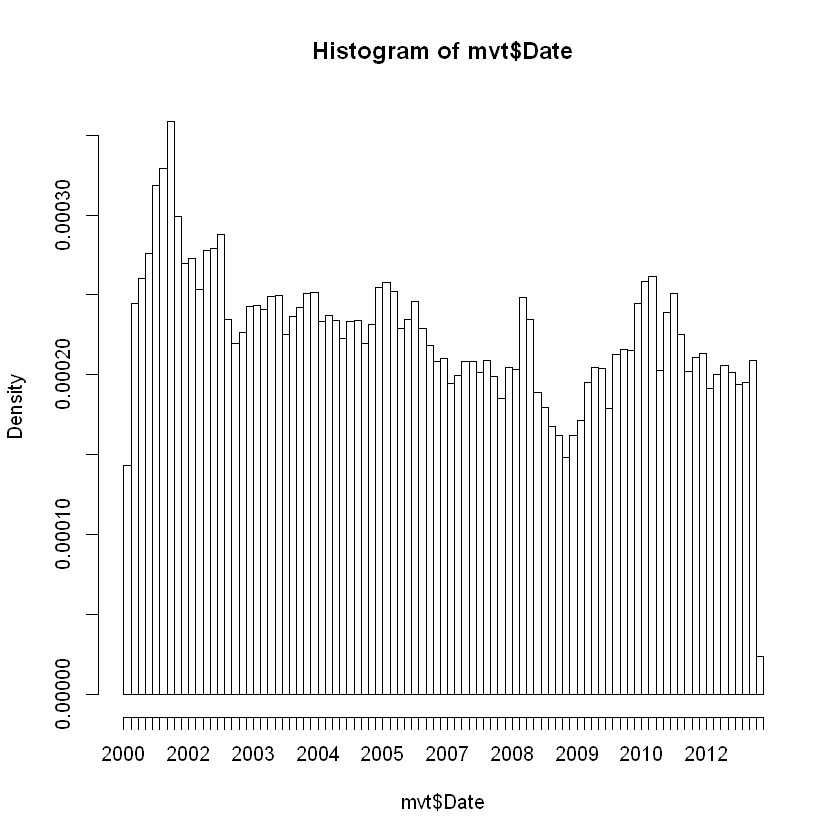

In [21]:
hist(mvt$Date, breaks=100)

Looking at the histogram, answer the following questions.

* In general, does it look like crime increases or decreases from 2002 - 2012? - Decrease
* In general, does it look like crime increases or decreases from 2005 - 2008? - Decrease  
* In general, does it look like crime increases or decreases from 2009 - 2011? - Increase
